AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar,
            Andrew Smith,
            Christopher Lee,
            Alireza Bagheri,
            Musa Azim,
            Kuba Jerzmanowski
         

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)


# Machine Learning in Python -  Clustering and Regression Workshop
<a href="https://www.scinbre.org/learning/bids-tutorials-and-workshops/2025-summer-workshops"> SC-INBRE SUMMER '25 Workshop  </a>
### May 28th, 2025

In [21]:
# Import all the libraries we'll need for our workshop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# First hour -  Understanding and Applying Clustering

## What is Clustering and Why Should You Care?

Imagine you're a researcher with a dataset containing information about hundreds of students, including their study habits, test scores, participation levels, and demographic information. You suspect there might be distinct "types" of students in your data, but you don't know what those types are or how many exist.

This is where **clustering** becomes invaluable. Clustering is an unsupervised learning technique that automatically groups similar data points together without requiring you to specify what those groups should be ahead of time.

### Clustering vs. Classification

Before we dive deeper, let's clarify a fundamental concept that often confuses newcomers to machine learning.

**Classification (Supervised Learning):**
- You know the categories ahead of time (e.g., "high performer," "average performer," "struggling student")
- You have examples of data points already labeled with these categories
- Goal: Train a model to predict the category for new, unlabeled data
- Example: Given student data with known performance levels, predict the performance level of a new student

**Clustering (Unsupervised Learning):**
- You don't know what the categories are or should be
- You have no pre-labeled examples
- Goal: Discover natural groupings or patterns in the data
- Example: Analyze student data to discover what types of learners exist in your population

Think of classification as having a set of labeled boxes and learning to sort new items into the correct boxes. Clustering is more like having a pile of items and discovering what natural groups they form when you arrange them by similarity.

## A Simple Example: Understanding Student Study Patterns

Let's start with a concrete example that demonstrates the power of clustering. Imagine we collected data on students' weekly study hours and their preferred study time (measured as hours after noon). We want to see if there are natural groupings of students based on these behaviors.

In [22]:
# Create synthetic student data that represents different study patterns

# Group 1: "Morning Studiers" - Study early, moderate hours
group1_hours = np.random.normal(loc=15, scale=2, size=50)  # loc = mean, scale = std, size = output shape
group1_time = np.random.normal(2, 1, 50)

# Group 2: "Evening Studiers" - Study late, high hours
group2_hours = np.random.normal(25, 2.5, 50) 
group2_time = np.random.normal(8, 1.5, 50)

# Group 3: "Light Studiers" - Study afternoon, low hours
group3_hours = np.random.normal(8, 1.5, 50)  
group3_time = np.random.normal(5, 1.2, 50)

# Combine
study_hours = np.concatenate([group1_hours, group2_hours, group3_hours])
preferred_time = np.concatenate([group1_time, group2_time, group3_time])

student_data = pd.DataFrame({
    'weekly_study_hours': study_hours,
    'preferred_study_time': preferred_time
})


print(f"We have data on {len(student_data)} students")
print("\nFirst few rows of our data:")
print(student_data.head(10))

We have data on 150 students

First few rows of our data:
   weekly_study_hours  preferred_study_time
0           17.411731              1.285830
1           17.112598              3.854731
2           16.705088              3.524599
3           16.378783              0.206246
4           14.550526              1.372470
5           13.955636              2.130076
6           13.319857              3.724754
7           17.361166              1.298790
8           12.342318              2.131909
9           14.751207              0.297669


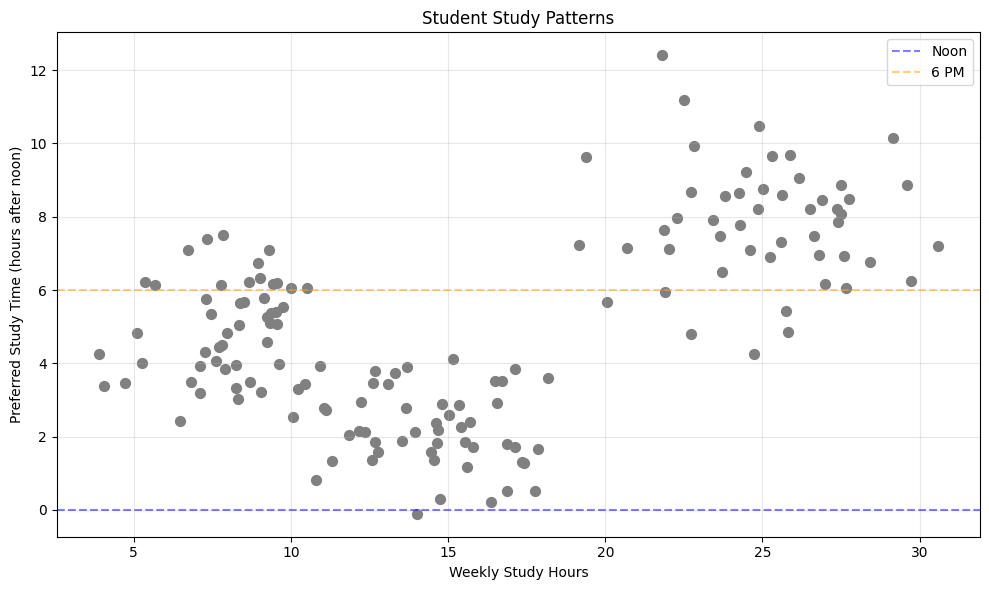

Looking at this plot, can you identify distinct groups of students?


In [23]:
# Let's visualize this data to see what patterns might exist
plt.figure(figsize=(10, 6))
plt.scatter(student_data['weekly_study_hours'], student_data['preferred_study_time'], s=50, c='gray')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Preferred Study Time (hours after noon)')
plt.title('Student Study Patterns')
plt.grid(True, alpha=0.3)

# Hortizontal lines for context
plt.axhline(y=0, color='blue', linestyle='--', alpha=0.5, label='Noon')
plt.axhline(y=6, color='orange', linestyle='--', alpha=0.5, label='6 PM')
plt.legend()

plt.tight_layout()
plt.show()

print("Looking at this plot, can you identify distinct groups of students?")

## The K-Means Algorithm: Step by Step

Now that we can visually see there might be groups in our data, let's learn how a computer can discover these groups automatically using the K-means algorithm. K-means is one of the most popular and intuitive clustering algorithms.

### How K-Means Works: The Intuition

Imagine you're organizing a potluck dinner and you want to arrange people into conversation groups. You might:

1. **Choose the number of groups** you want (this is the "K" in K-means)
2. **Place group leaders** randomly around the room
3. **Assign each person** to the closest group leader
4. **Move each group leader** to the center of their group
5. **Repeat steps 3-4** until the groups stabilize

K-means follows exactly this process, but with data points instead of people!

### The K-Means Algorithm in Detail

Let's implement K-means step by step to understand exactly how it works:

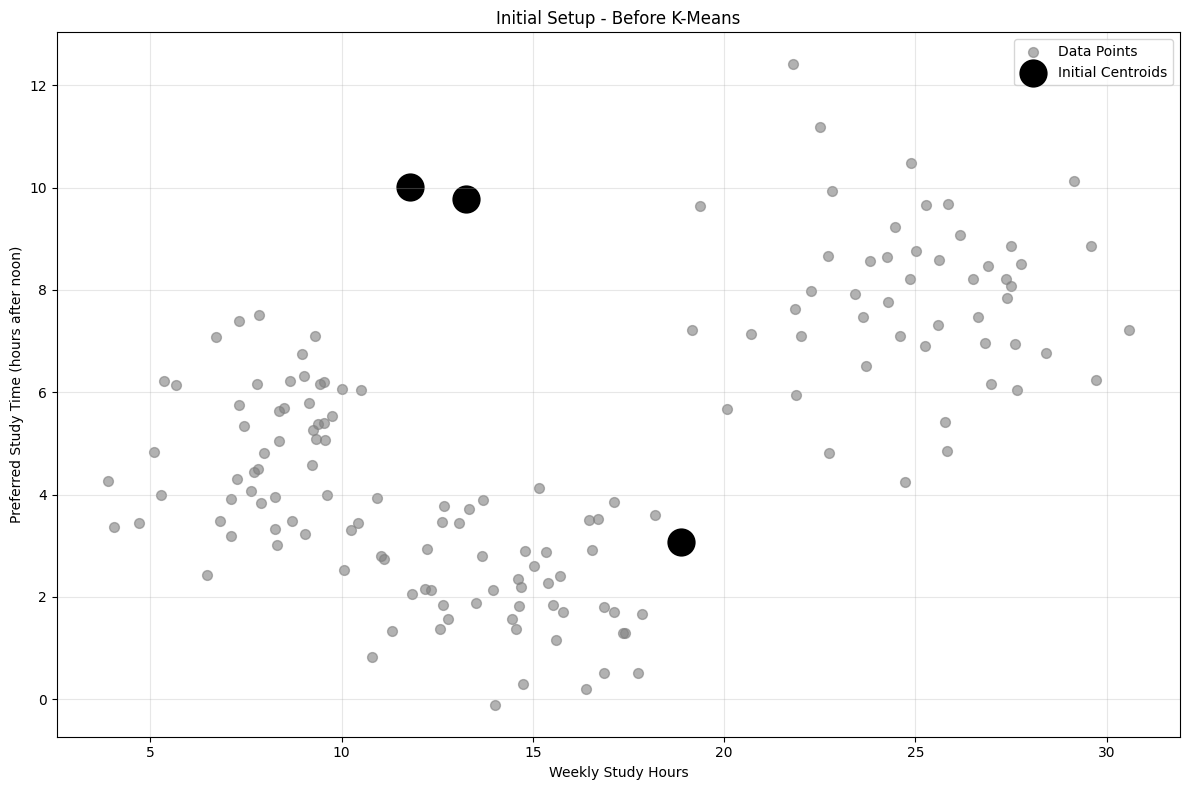

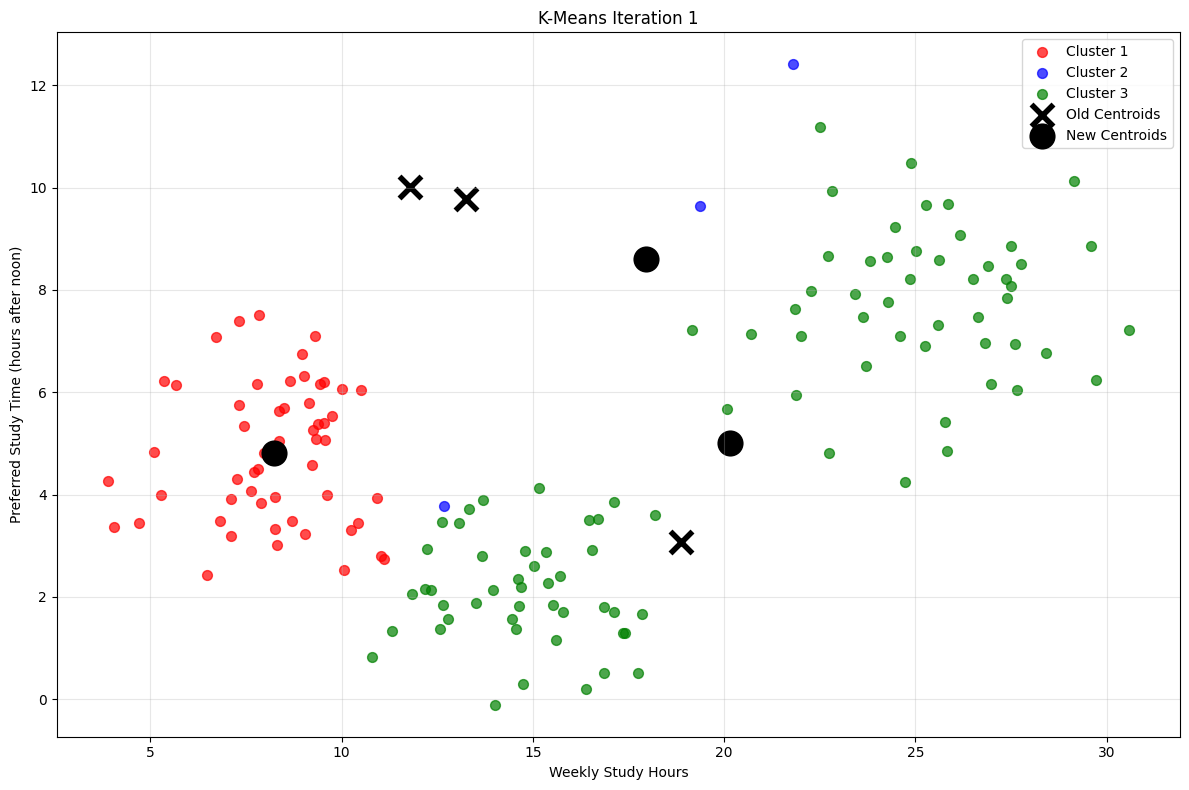

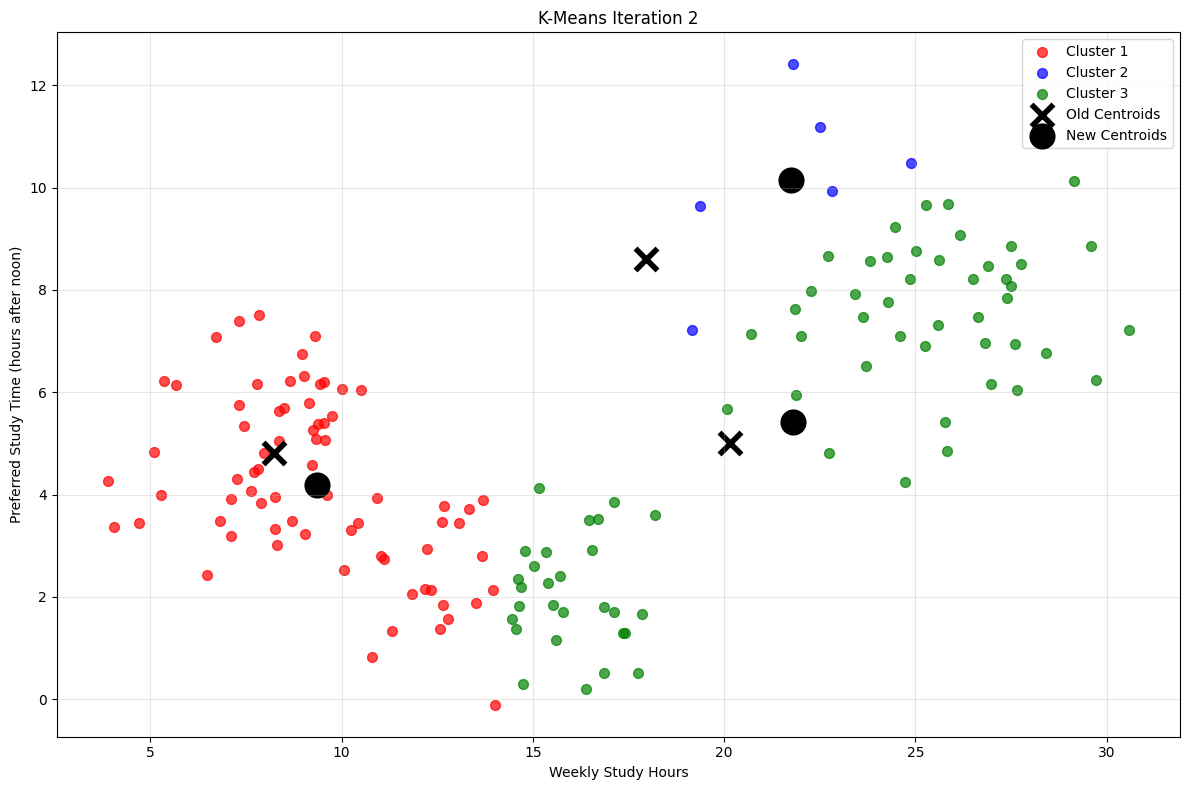

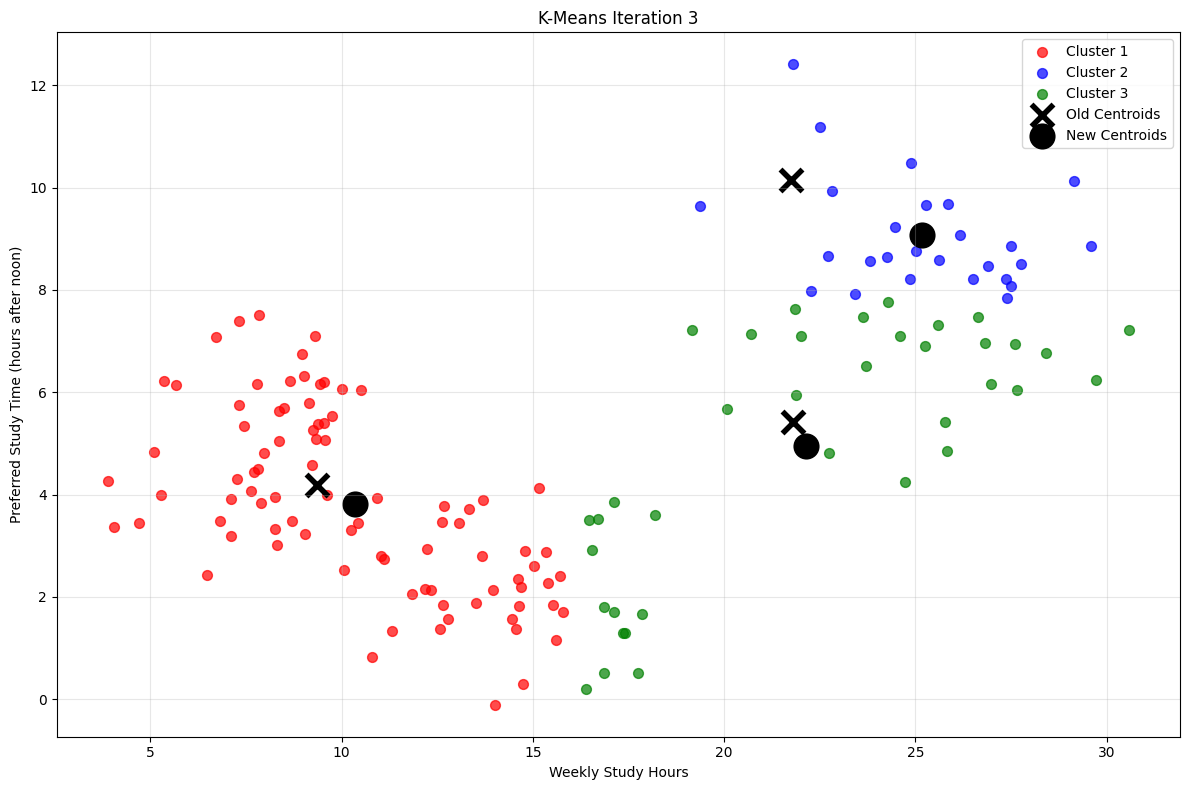

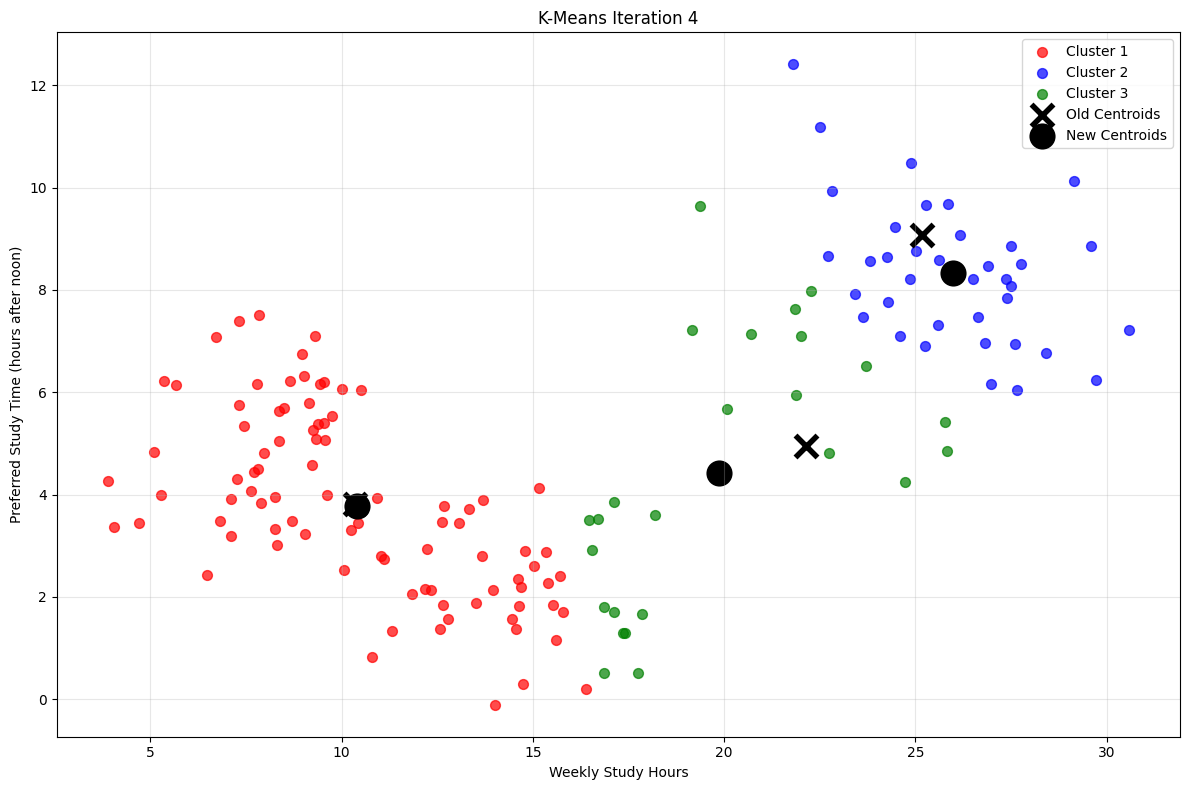

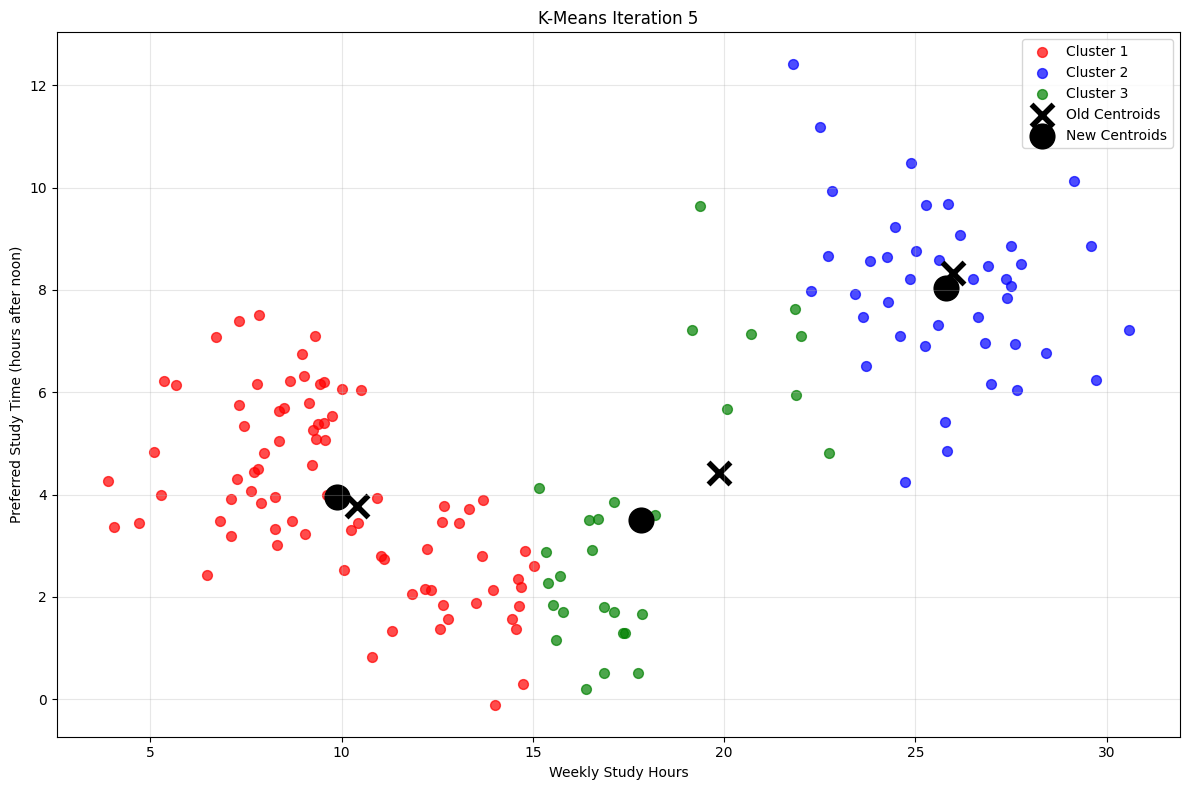

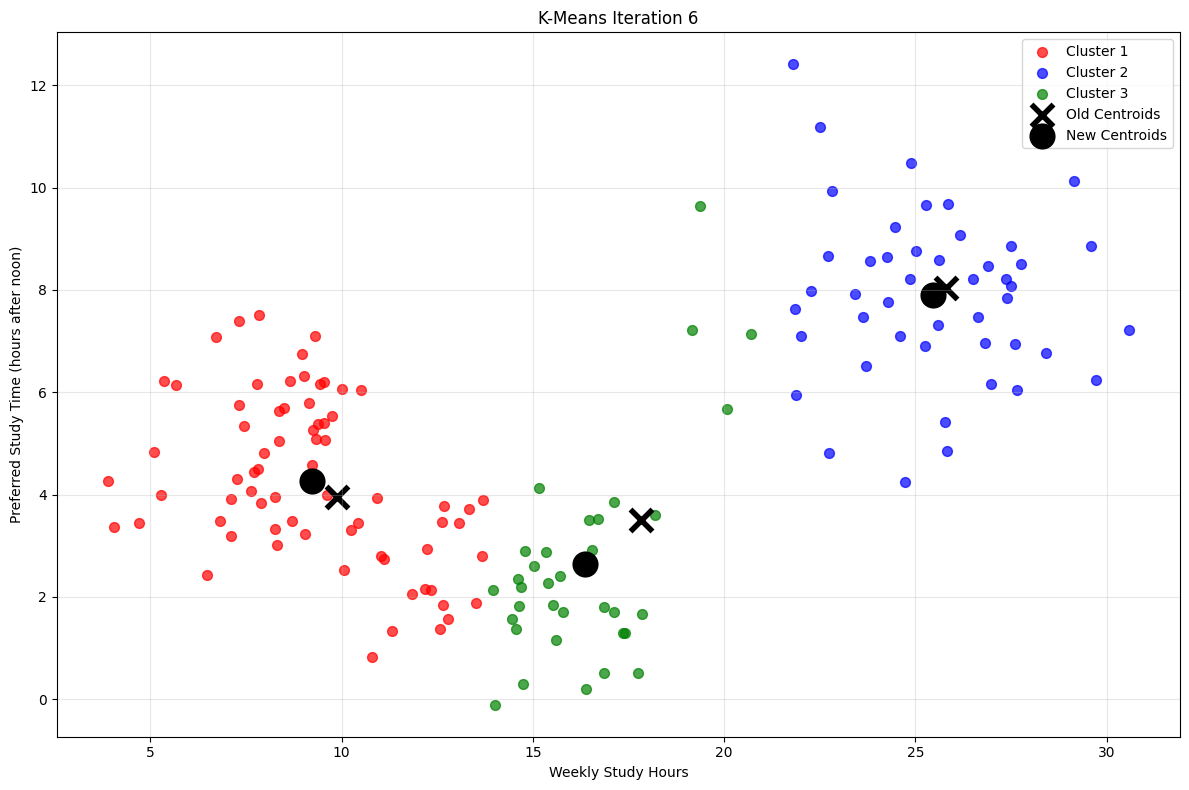

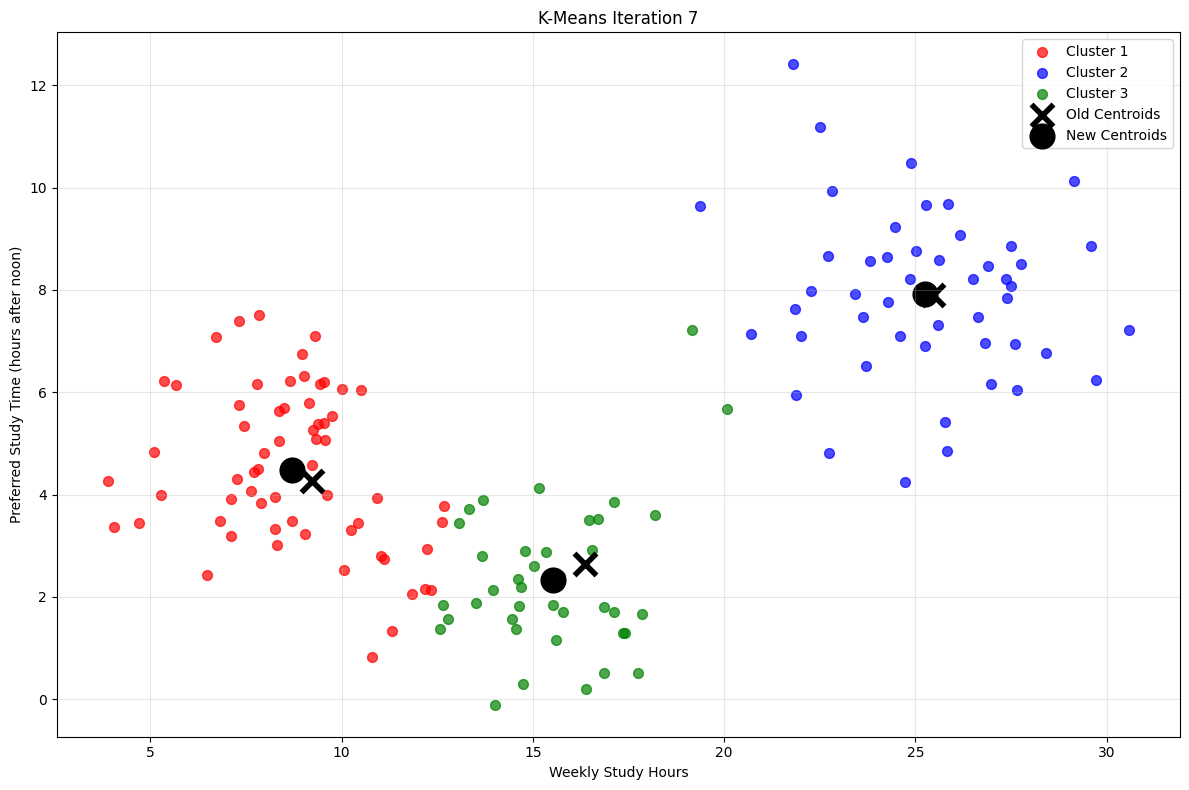

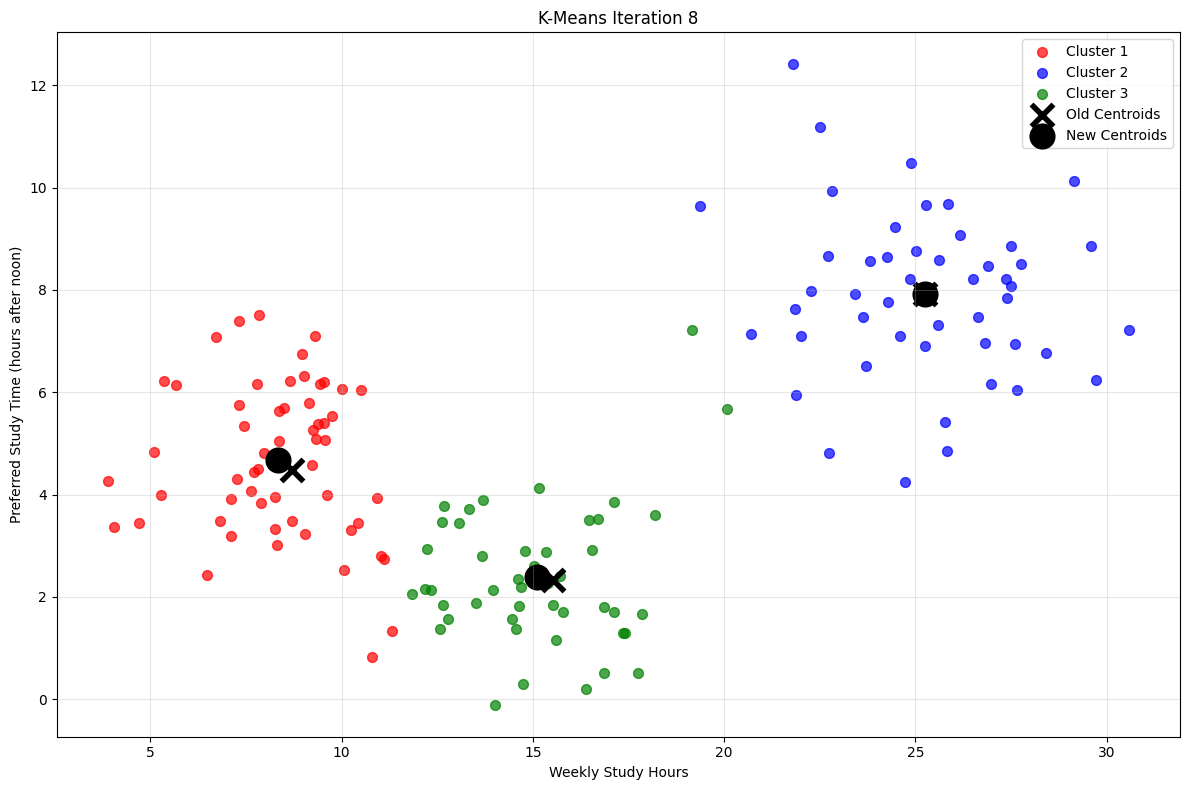

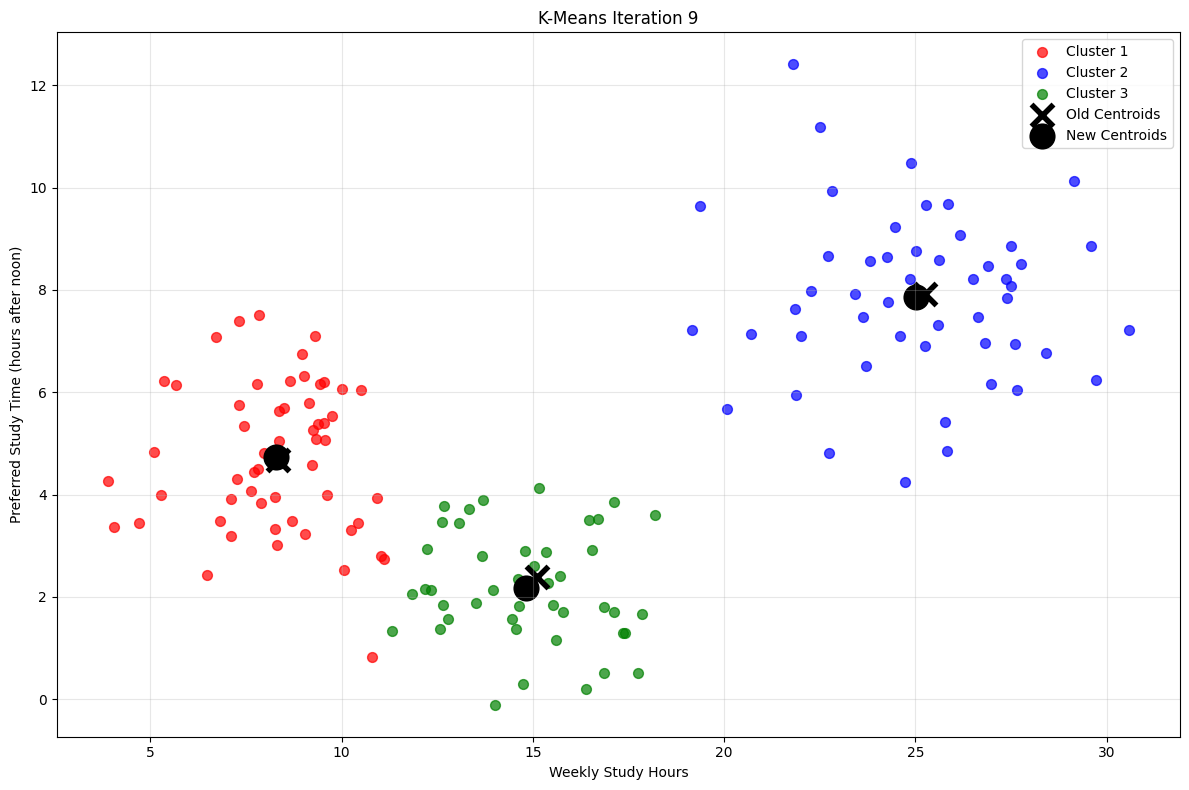

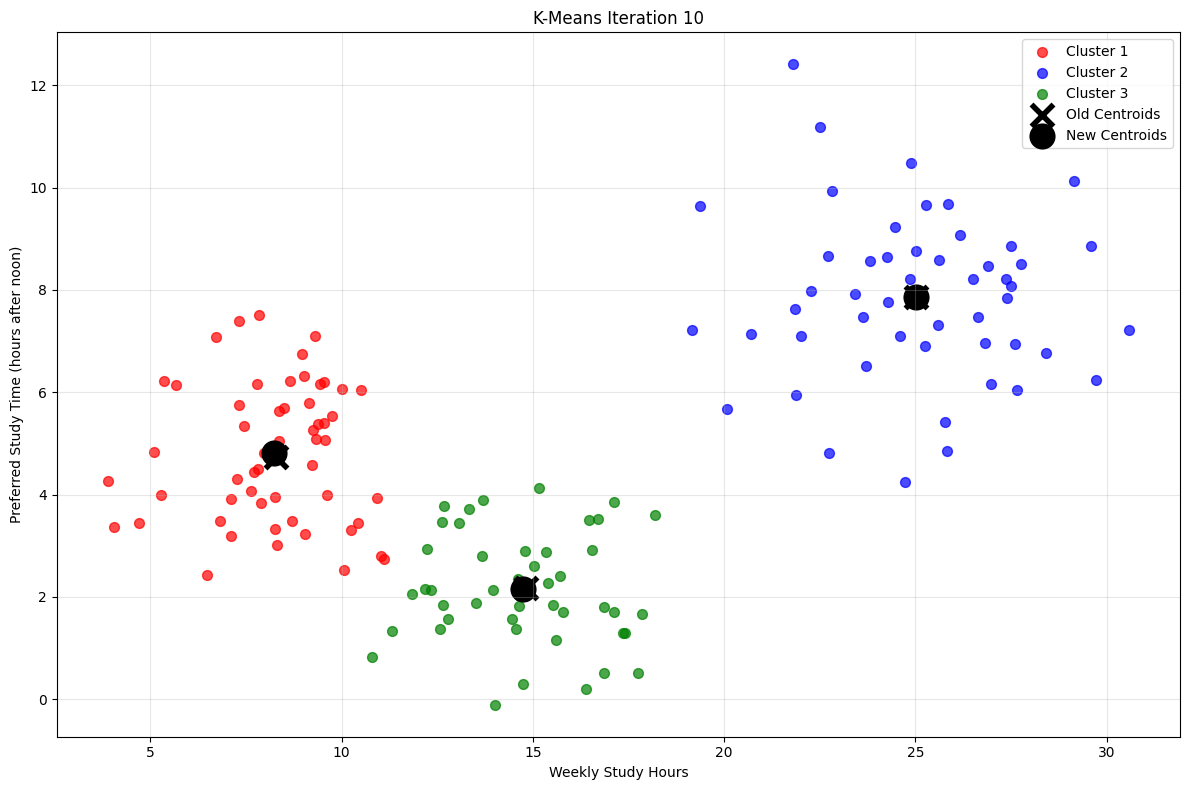

In [24]:
def demonstrate_kmeans_steps_fixed(data, k=3, max_iterations=10):
    """
    Demonstrate K-means clustering step by step with visualizations.
    Fixed version that properly assigns points to closest centroids.
    """
    # Step 1: Initialize centroids randomly
    np.random.seed(69)
    centroids = np.random.rand(k, 2)
    centroids[:, 0] = centroids[:, 0] * (data[:, 0].max() - data[:, 0].min()) + data[:, 0].min()
    centroids[:, 1] = centroids[:, 1] * (data[:, 1].max() - data[:, 1].min()) + data[:, 1].min()
    
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    
    # Visualize initial setup
    plt.figure(figsize=(12, 8))
    plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.6, s=50, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='o', 
               s=300, linewidths=3, facecolors='white', edgecolors='black', 
               label='Initial Centroids')
    plt.xlabel('Weekly Study Hours')
    plt.ylabel('Preferred Study Time (hours after noon)')
    plt.title('Initial Setup - Before K-Means')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    for iteration in range(max_iterations):
        # Step 2: Assign each point to the closest centroid
        distances = np.zeros((len(data), k))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.sqrt(np.sum((data - centroid)**2, axis=1))
        
        # Find the closest centroid for each point
        closest_centroid = np.argmin(distances, axis=1)
        
        # Step 3: Update centroids to the mean of assigned points
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            cluster_points = data[closest_centroid == i]
            if len(cluster_points) > 0:
                new_centroids[i] = cluster_points.mean(axis=0)
            else:
                new_centroids[i] = centroids[i]
        
        # Visualize this iteration
        plt.figure(figsize=(12, 8))
        
        # Plot points colored by their cluster assignment
        for i in range(k):
            cluster_points = data[closest_centroid == i]
            if len(cluster_points) > 0:
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], alpha=0.7, s=50, label=f'Cluster {i+1}')
        
        # Plot old centroids (smaller, with X)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=250, linewidths=4, label='Old Centroids')
        
        # Plot new centroids (larger, filled circles)
        plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='black', marker='o', s=250, linewidths=3, facecolors='white', edgecolors='black', label='New Centroids')
        
        plt.xlabel('Weekly Study Hours')
        plt.ylabel('Preferred Study Time (hours after noon)')
        plt.title(f'K-Means Iteration {iteration + 1}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Check for convergence
        if np.allclose(centroids, new_centroids, rtol=1e-4):
            print(f"Converged after {iteration + 1} iterations!")
            break
        
        centroids = new_centroids.copy()
    
    return new_centroids, closest_centroid

    
final_centroids, final_assignments = demonstrate_kmeans_steps_fixed(np.vstack([study_hours, preferred_time]).T, k=3)

## Using Scikit-Learn for K-Means Clustering

While it's valuable to understand how K-means works internally, in practice we typically use well-tested implementations like those in scikit-learn. Let's see how to apply K-means to our student data using the professional tools:

In [25]:
# Apply K-means clustering using scikit-learn
from sklearn.cluster import KMeans 


# We'll start by assuming we want 3 clusters (we'll learn how to choose this number later)
kmeans = KMeans(n_clusters=3, random_state=42)

In [26]:
print(np.vstack([study_hours, preferred_time]).T.shape)
data = np.vstack([study_hours, preferred_time]).T
cluster_labels = kmeans.fit_predict(data)
cluster_labels

(150, 2)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
# Add cluster labels to our DataFrame
student_data['cluster'] = cluster_labels
student_data

,weekly_study_hours,preferred_study_time,cluster
0,17.411731,1.285830,2
1,17.112598,3.854731,2
2,16.705088,3.524599,2
3,16.378783,0.206246,2
4,14.550526,1.372470,2
...,...,...,...
145,10.014708,6.065085,1
146,7.270792,4.304619,1
147,7.624417,4.076780,1
148,10.921158,3.928552,1


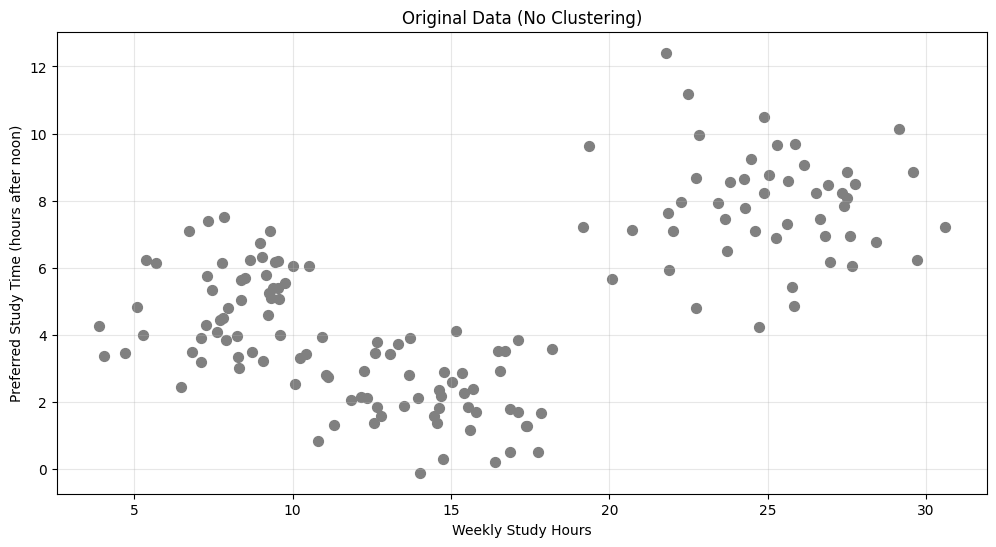

In [39]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Plot 1: Original data without clustering
plt.scatter(student_data['weekly_study_hours'], student_data['preferred_study_time'], s=50, c='gray')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Preferred Study Time (hours after noon)')
plt.title('Original Data (No Clustering)')
plt.grid(True, alpha=0.3)
plt.show()

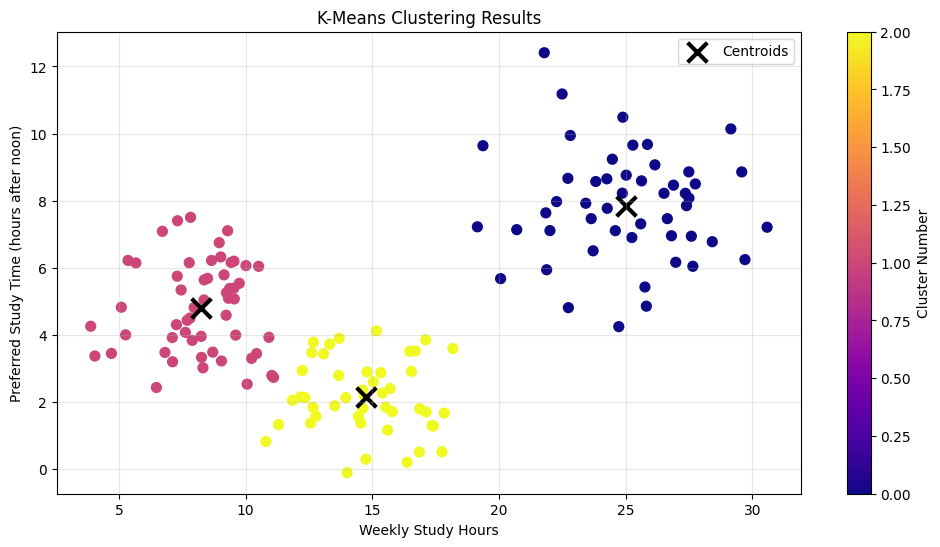

In [49]:
# Plot 2: Data with K-means clustering
plt.figure(figsize=(12, 6))

# Create the scatter plot
scatter = plt.scatter(student_data['weekly_study_hours'], student_data['preferred_study_time'], s=50, c=student_data['cluster'], cmap='plasma')
# Create a colorbar legend for clusters
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Number')


# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')

plt.xlabel('Weekly Study Hours')
plt.ylabel('Preferred Study Time (hours after noon)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

If you prefer discrete legend entries for each cluster

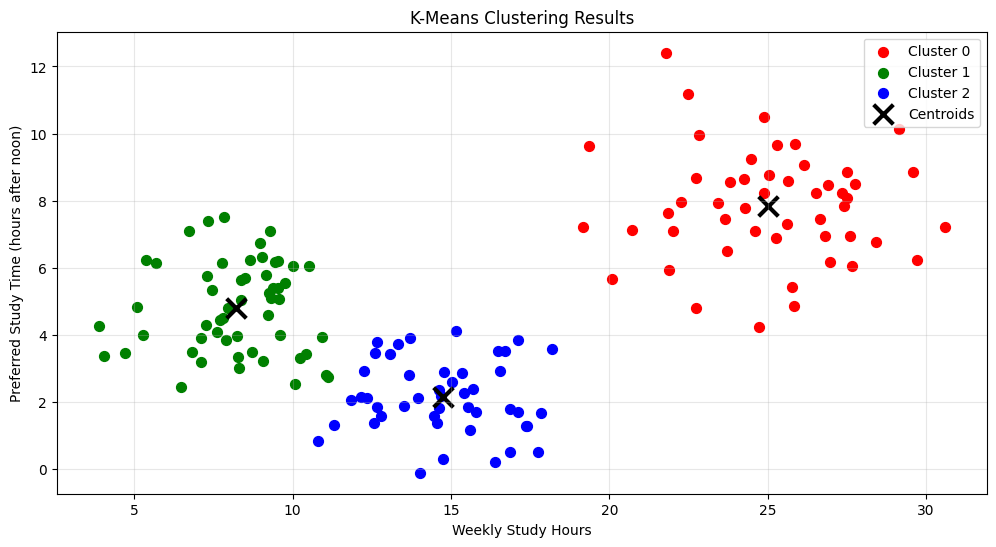

In [52]:
# Plot 2: Data with K-means clustering
plt.figure(figsize=(12, 6))

# Get unique clusters and colors
unique_clusters = np.unique(student_data['cluster'])
colors = ['red', 'green', 'blue']

# Plot each cluster with its own legend entry
for i, cluster_id in enumerate(unique_clusters):
    mask = student_data['cluster'] == cluster_id
    plt.scatter(student_data.loc[mask, 'weekly_study_hours'], student_data.loc[mask, 'preferred_study_time'], 
               s=50, c=[colors[i]], label=f'Cluster {cluster_id}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')

plt.xlabel('Weekly Study Hours')
plt.ylabel('Preferred Study Time (hours after noon)')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Cluster Analysis:

In [54]:

for i in range(3): # We have three clusters 0,1,2
    cluster_data = student_data[student_data['cluster'] == i]
    avg_hours = cluster_data['weekly_study_hours'].mean()
    avg_time = cluster_data['preferred_study_time'].mean()
    count = len(cluster_data)
    
    print(f"\nCluster {i+1} ({count} students):")
    print(f"  Average study hours per week: {avg_hours:.1f}")

    # Interpret the time
    if avg_time < 3:
        time_description = "Early Afternoon"
    elif avg_time < 6:
        time_description = "Late Afternoon"
    else:
        time_description = "Evening"
    

    print(f"  Preferred study time: {time_description} ({avg_time:.1f} hours after noon)")
    
    # Give each cluster a descriptive name
    if avg_hours > 20:
        intensity = "High-Intensity"
    elif avg_hours > 12:
        intensity = "Moderate"
    else:
        intensity = "Light"
    

    print(f"  Profile: {intensity} {time_description} Studiers")


Cluster 1 (50 students):
  Average study hours per week: 25.0
  Preferred study time: Evening (7.9 hours after noon)
  Profile: High-Intensity Evening Studiers

Cluster 2 (54 students):
  Average study hours per week: 8.2
  Preferred study time: Late Afternoon (4.8 hours after noon)
  Profile: Light Late Afternoon Studiers

Cluster 3 (46 students):
  Average study hours per week: 14.7
  Preferred study time: Early Afternoon (2.2 hours after noon)
  Profile: Moderate Early Afternoon Studiers


## Choosing the Right Number of Clusters: The Elbow Method

One of the biggest challenges in clustering is determining how many clusters your data naturally contains. We chose 3 clusters above, but how do we know that's the right number? 

The **Elbow Method** is a popular technique for finding the optimal number of clusters. It works by measuring how "tight" the clusters are for different values of k and looking for the point where adding more clusters doesn't significantly improve the clustering quality.


<br><br>
We will use `itertia` a measure of how well a dataset has been grouped by the algorithm.

It represents the sum of the squared distances between each data point and the centroid of its assigned cluster

In [ ]:
inertias = []

for k in range(1, 11): # 1-10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_) 

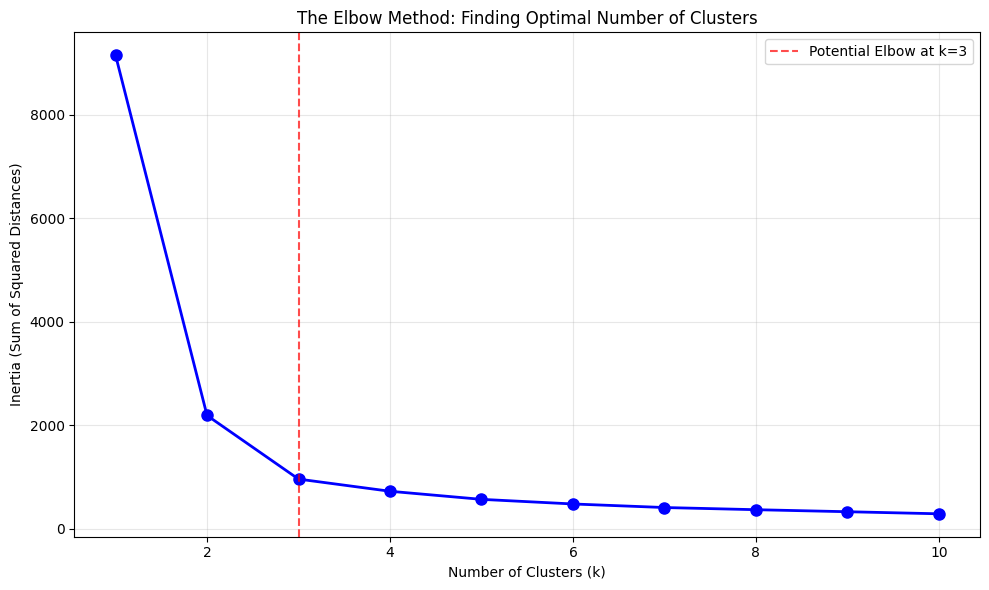

In [63]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('The Elbow Method: Finding Optimal Number of Clusters')
plt.grid(True, alpha=0.3)

# Highlight the "elbow" point
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='Potential Elbow at k=3')
plt.legend()

plt.tight_layout()
plt.show()

Interpretation:
- As k increases, inertia always decreases (clusters get tighter)
- The 'elbow' represents the best trade-off between cluster tightness and simplicity
- Beyond the elbow, adding more clusters doesn't provide much benefit

## Real-World Application: Analyzing Research Publication Patterns

Let's apply our clustering knowledge to a more complex, real-world scenario that many academics will find familiar. Imagine you're analyzing publication patterns of researchers in your field, looking at factors like:
- Number of publications per year
- Average number of citations per paper
- Collaboration index (average number of co-authors)

This type of analysis could help identify different "research profiles" in your field.

In [64]:
# Generate synthetic research data representing different types of researchers
np.random.seed(42)

# Type 1: "Prolific Solo Researchers" - Many papers, fewer citations, low collaboration
prolific_solo = np.random.multivariate_normal(
    [8, 15, 2], [[4, 2, 0.5], [2, 10, 1], [0.5, 1, 0.5]], 40)

# Type 2: "Collaborative Stars" - Moderate papers, high citations, high collaboration
collaborative = np.random.multivariate_normal(
    [4, 35, 6], [[2, 5, 1], [5, 50, 3], [1, 3, 2]], 35)

# Type 3: "Early Career" - Few papers, low citations, moderate collaboration
early_career = np.random.multivariate_normal(
    [2, 8, 3], [[1, 1, 0.3], [1, 5, 0.5], [0.3, 0.5, 1]], 45)

# Type 4: "Steady Contributors" - Moderate everything
steady = np.random.multivariate_normal(
    [5, 20, 4], [[2, 3, 0.5], [3, 15, 1], [0.5, 1, 1]], 30)

# Combine all researcher types
all_researchers = np.vstack([prolific_solo, collaborative, early_career, steady])

# Ensure no negative values (which wouldn't make sense for our metrics)
all_researchers = np.maximum(all_researchers, 0.1)

# Create DataFrame
research_data = pd.DataFrame({
    'papers_per_year': all_researchers[:, 0],
    'avg_citations': all_researchers[:, 1],
    'collaboration_index': all_researchers[:, 2]
})

print(f"Research dataset: {len(research_data)} researchers")
print("\nDataset statistics:")
print(research_data.describe().round(2))

Research dataset: 150 researchers

Dataset statistics:
       papers_per_year  avg_citations  collaboration_index
count           150.00         150.00               150.00
mean              4.46          18.25                 3.53
std               2.84          10.38                 1.77
min               0.10           2.87                 0.10
25%               2.07           9.52                 2.27
50%               4.01          15.78                 3.16
75%               6.58          24.64                 4.67
max              11.83          45.82                 8.70


Why do we need to standardize the data?

Original data ranges:
papers_per_year: 0.1 to 11.8
avg_citations: 2.9 to 45.8
collaboration_index: 0.1 to 8.7

Without standardization, features with larger ranges would dominate the clustering.
For example, citations (range ~0-80) would be more influential than papers per year (range ~0-15).

Finding optimal number of clusters for research data...


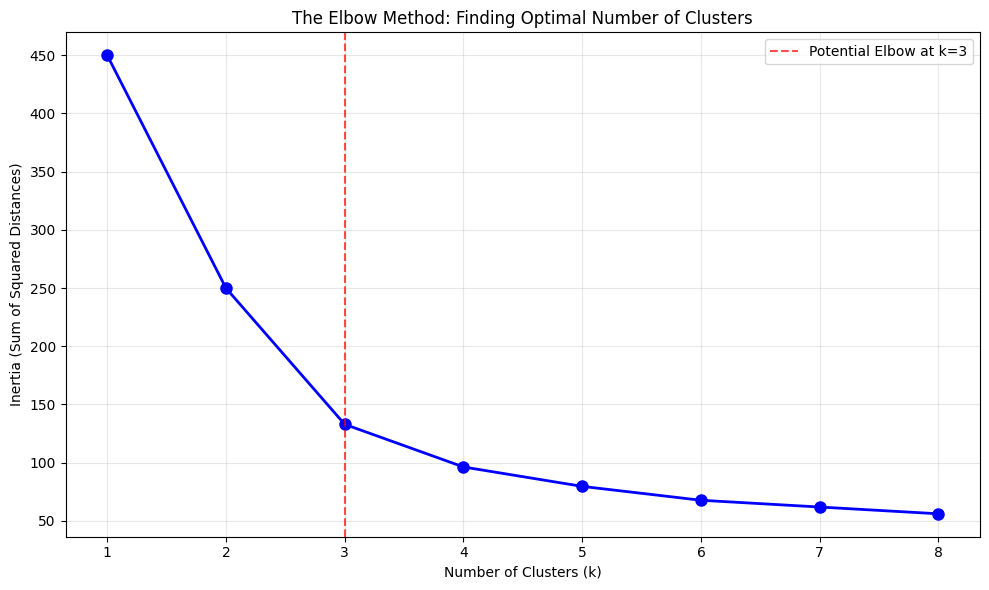

In [65]:
# Before clustering, let's standardize the data
# This is important when features have different scales
scaler = StandardScaler()
research_scaled = scaler.fit_transform(research_data)

print("Why do we need to standardize the data?")
print("\nOriginal data ranges:")
for col in research_data.columns:
    print(f"{col}: {research_data[col].min():.1f} to {research_data[col].max():.1f}")

print("\nWithout standardization, features with larger ranges would dominate the clustering.")
print("For example, citations (range ~0-80) would be more influential than papers per year (range ~0-15).")

# Find optimal number of clusters
print("\nFinding optimal number of clusters for research data...")
research_inertias = find_optimal_clusters(research_scaled, max_k=8)

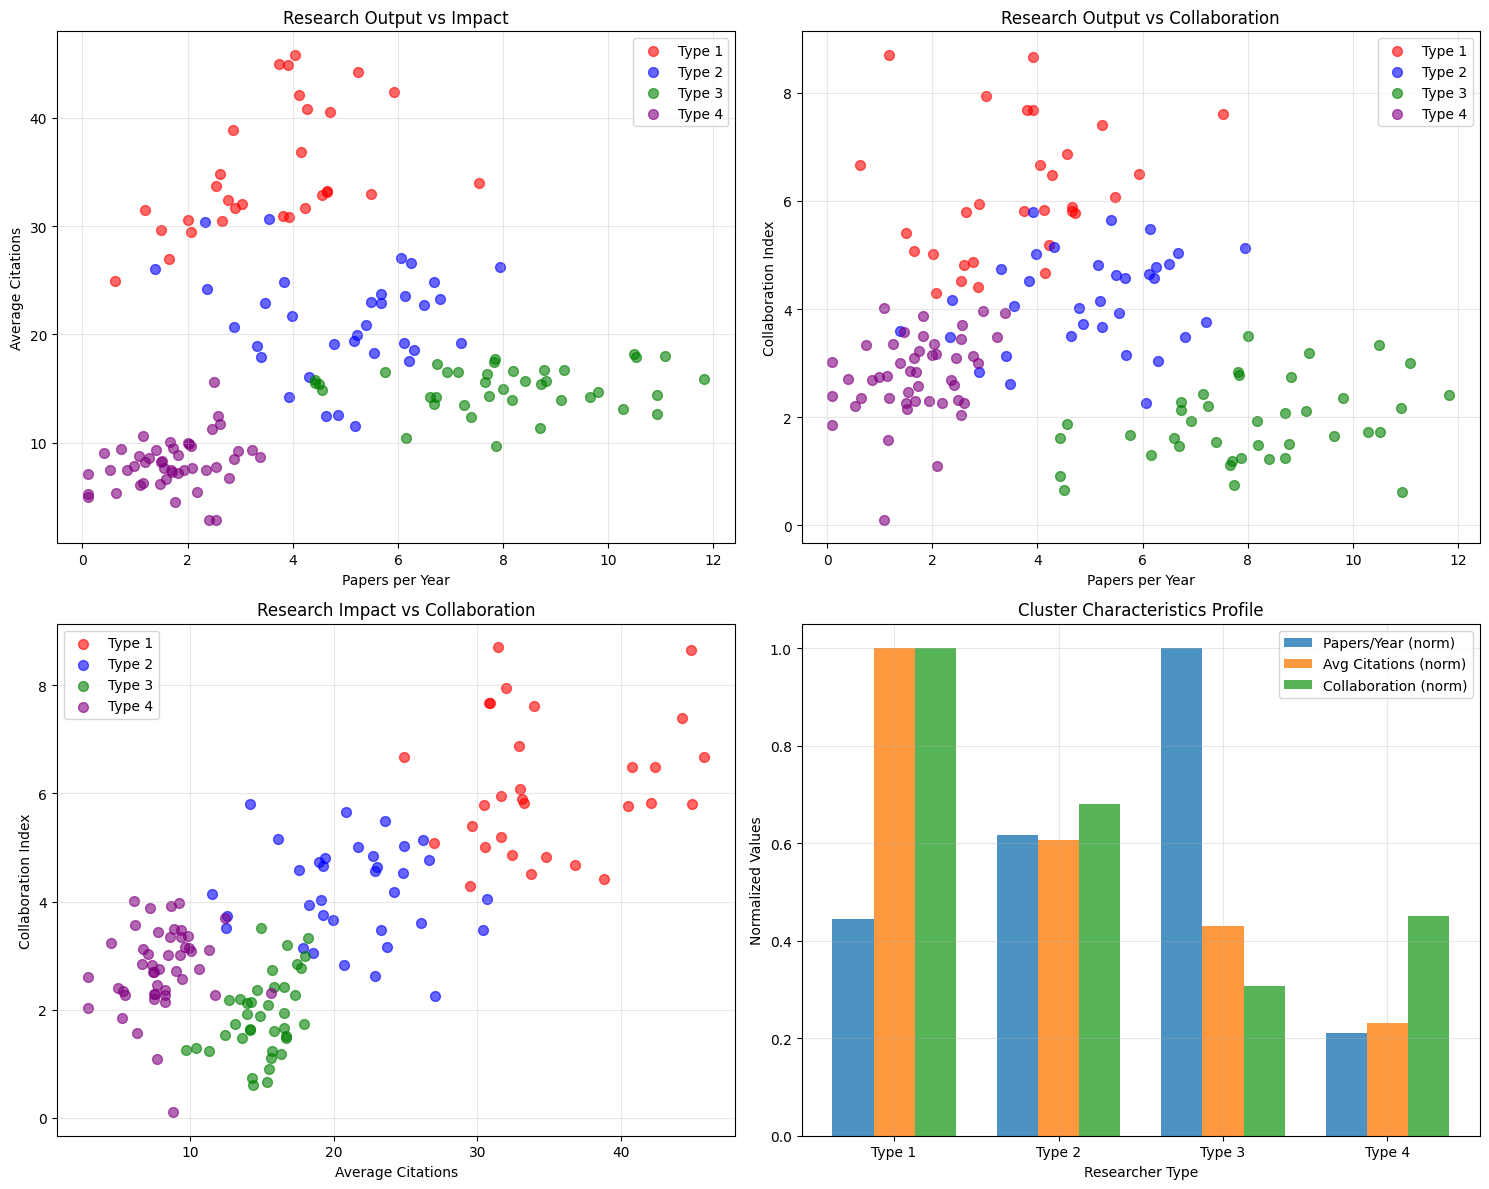


Researcher Type Analysis:

Type 1 (30 researchers):
  Papers per year: 3.6
  Average citations: 35.0
  Collaboration index: 6.1
  Profile: High-Impact Collaborators

Type 2 (34 researchers):
  Papers per year: 5.0
  Average citations: 21.2
  Collaboration index: 4.2
  Profile: Steady Contributors

Type 3 (39 researchers):
  Papers per year: 8.0
  Average citations: 15.1
  Collaboration index: 1.9
  Profile: Prolific Solo Researchers

Type 4 (47 researchers):
  Papers per year: 1.7
  Average citations: 8.1
  Collaboration index: 2.8
  Profile: Emerging Researchers


In [66]:
# Apply K-means with the optimal number of clusters (let's use 4 based on our elbow plot)
research_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
research_clusters = research_kmeans.fit_predict(research_scaled)

# Add cluster labels to original data
research_data['cluster'] = research_clusters

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
colors = ['red', 'blue', 'green', 'purple']

# Plot 1: Papers vs Citations
for i in range(4):
    cluster_data = research_data[research_data['cluster'] == i]
    axes[0, 0].scatter(cluster_data['papers_per_year'], cluster_data['avg_citations'], 
                      alpha=0.6, s=50, c=colors[i], label=f'Type {i+1}')
axes[0, 0].set_xlabel('Papers per Year')
axes[0, 0].set_ylabel('Average Citations')
axes[0, 0].set_title('Research Output vs Impact')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Papers vs Collaboration
for i in range(4):
    cluster_data = research_data[research_data['cluster'] == i]
    axes[0, 1].scatter(cluster_data['papers_per_year'], cluster_data['collaboration_index'], 
                      alpha=0.6, s=50, c=colors[i], label=f'Type {i+1}')
axes[0, 1].set_xlabel('Papers per Year')
axes[0, 1].set_ylabel('Collaboration Index')
axes[0, 1].set_title('Research Output vs Collaboration')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Citations vs Collaboration
for i in range(4):
    cluster_data = research_data[research_data['cluster'] == i]
    axes[1, 0].scatter(cluster_data['avg_citations'], cluster_data['collaboration_index'], 
                      alpha=0.6, s=50, c=colors[i], label=f'Type {i+1}')
axes[1, 0].set_xlabel('Average Citations')
axes[1, 0].set_ylabel('Collaboration Index')
axes[1, 0].set_title('Research Impact vs Collaboration')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Cluster characteristics summary
cluster_summary = research_data.groupby('cluster').mean()
x = np.arange(4)
width = 0.25

# Normalize for better visualization
norm_papers = cluster_summary['papers_per_year'] / cluster_summary['papers_per_year'].max()
norm_citations = cluster_summary['avg_citations'] / cluster_summary['avg_citations'].max()
norm_collab = cluster_summary['collaboration_index'] / cluster_summary['collaboration_index'].max()

axes[1, 1].bar(x - width, norm_papers, width, label='Papers/Year (norm)', alpha=0.8)
axes[1, 1].bar(x, norm_citations, width, label='Avg Citations (norm)', alpha=0.8)
axes[1, 1].bar(x + width, norm_collab, width, label='Collaboration (norm)', alpha=0.8)

axes[1, 1].set_xlabel('Researcher Type')
axes[1, 1].set_ylabel('Normalized Values')
axes[1, 1].set_title('Cluster Characteristics Profile')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels([f'Type {i+1}' for i in range(4)])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze each cluster
print("\nResearcher Type Analysis:")
print("="*60)
for i in range(4):
    cluster_data = research_data[research_data['cluster'] == i]
    count = len(cluster_data)
    avg_papers = cluster_data['papers_per_year'].mean()
    avg_citations = cluster_data['avg_citations'].mean()
    avg_collab = cluster_data['collaboration_index'].mean()
    
    print(f"\nType {i+1} ({count} researchers):")
    print(f"  Papers per year: {avg_papers:.1f}")
    print(f"  Average citations: {avg_citations:.1f}")
    print(f"  Collaboration index: {avg_collab:.1f}")
    
    # Characterize each type
    if avg_papers > 6 and avg_collab < 3:
        type_name = "Prolific Solo Researchers"
    elif avg_citations > 30:
        type_name = "High-Impact Collaborators"
    elif avg_papers < 3:
        type_name = "Emerging Researchers"
    else:
        type_name = "Steady Contributors"
    
    print(f"  Profile: {type_name}")

## Hour 1 Exercise: Clustering Student Performance Data

Now it's your turn to apply clustering! You've been given data about student performance across different dimensions. Your task is to identify distinct student profiles that could inform targeted intervention strategies.

**Scenario:** You're analyzing student data to identify different learning profiles in your course. The data includes attendance rates, assignment completion rates, participation scores, and final exam performance.

In [70]:
# Generate student performance data for the exercise
np.random.seed(123)

# Create different student profiles
# Profile 1: "Engaged Achievers" - High across all metrics
engaged = np.random.multivariate_normal(
    [0.92, 0.88, 0.85, 0.82], 
    [[0.002, 0.001, 0.001, 0.002], 
     [0.001, 0.003, 0.001, 0.002],
     [0.001, 0.001, 0.004, 0.001],
     [0.002, 0.002, 0.001, 0.005]], 30)

# Profile 2: "Strugglers" - Low across all metrics
struggling = np.random.multivariate_normal(
    [0.65, 0.55, 0.45, 0.35],
    [[0.003, 0.001, 0.001, 0.001],
     [0.001, 0.004, 0.002, 0.001],
     [0.001, 0.002, 0.005, 0.002],
     [0.001, 0.001, 0.002, 0.006]], 25)

# Profile 3: "Test Anxious" - Good attendance and participation, poor exam performance
test_anxious = np.random.multivariate_normal(
    [0.85, 0.75, 0.80, 0.45],
    [[0.002, 0.001, 0.001, 0.001],
     [0.001, 0.003, 0.001, 0.001],
     [0.001, 0.001, 0.003, 0.001],
     [0.001, 0.001, 0.001, 0.004]], 20)

# Profile 4: "Natural Talent" - Low engagement but high exam scores
natural_talent = np.random.multivariate_normal(
    [0.70, 0.60, 0.50, 0.85],
    [[0.003, 0.001, 0.001, 0.001],
     [0.001, 0.004, 0.001, 0.001],
     [0.001, 0.001, 0.004, 0.001],
     [0.001, 0.001, 0.001, 0.003]], 15)

# Combine all profiles
all_performance = np.vstack([engaged, struggling, test_anxious, natural_talent])

# Ensure values stay within reasonable bounds
all_performance = np.clip(all_performance, 0, 1)

# Create DataFrame
student_performance = pd.DataFrame({
    'attendance_rate': all_performance[:, 0],
    'assignment_completion': all_performance[:, 1],
    'participation_score': all_performance[:, 2],
    'exam_performance': all_performance[:, 3]
})

print("Student Performance Dataset")
print("="*40)
print(f"Number of students: {len(student_performance)}")
print("\nDataset preview:")
print(student_performance.head(10).round(3))
print("\nDataset statistics:")
print(student_performance.describe().round(3))

Student Performance Dataset
Number of students: 90

Dataset preview:
   attendance_rate  assignment_completion  participation_score  \
0            0.998                  0.912                0.934   
1            0.922                  0.989                0.941   
2            0.874                  0.858                0.756   
3            0.878                  0.840                0.760   
4            0.841                  0.746                0.894   
5            0.850                  0.878                0.903   
6            1.000                  0.901                0.858   
7            0.999                  0.904                0.794   
8            0.996                  0.918                0.879   
9            0.901                  0.910                0.883   

   exam_performance  
0             0.847  
1             0.772  
2             0.751  
3             0.731  
4             0.645  
5             0.736  
6             0.910  
7             0.811  
8     

EXERCISE: Clustering Student Performance Data

Your tasks:
1. Standardize the data (Why is this important?)
2. Use the elbow method to find the optimal number of clusters
3. Apply K-means clustering with the optimal k
4. Visualize and interpret the results
5. Provide educational recommendations for each cluster

--------------------------------------------------
Start your analysis below:
✓ Data standardized

Finding optimal number of clusters...


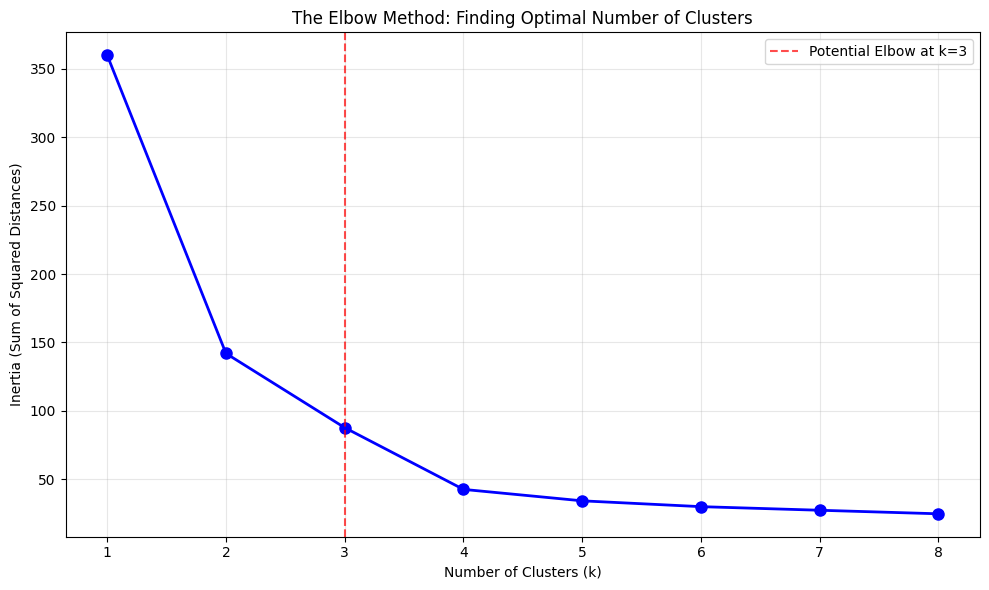


✓ K-means applied with k=4
✓ Cluster assignments added to dataset


In [68]:
# YOUR TASK: Complete this clustering analysis
print("EXERCISE: Clustering Student Performance Data")
print("="*50)
print("\nYour tasks:")
print("1. Standardize the data (Why is this important?)")
print("2. Use the elbow method to find the optimal number of clusters")
print("3. Apply K-means clustering with the optimal k")
print("4. Visualize and interpret the results")
print("5. Provide educational recommendations for each cluster")

print("\n" + "-"*50)
print("Start your analysis below:")

# Step 1: Standardize the data
# TODO: Create a StandardScaler and fit_transform the student_performance data
performance_scaler = StandardScaler()
performance_scaled = performance_scaler.fit_transform(student_performance)

print("✓ Data standardized")

# Step 2: Find optimal number of clusters
# TODO: Use the find_optimal_clusters function
print("\nFinding optimal number of clusters...")
performance_inertias = find_optimal_clusters(performance_scaled, max_k=8)

# Step 3: Apply K-means (choose k based on your elbow plot)
# TODO: Create KMeans object and fit to the scaled data
optimal_k = 4  # Adjust this based on your elbow plot
performance_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
performance_clusters = performance_kmeans.fit_predict(performance_scaled)

# Add clusters to original data
student_performance['cluster'] = performance_clusters

print(f"\n✓ K-means applied with k={optimal_k}")
print(f"✓ Cluster assignments added to dataset")

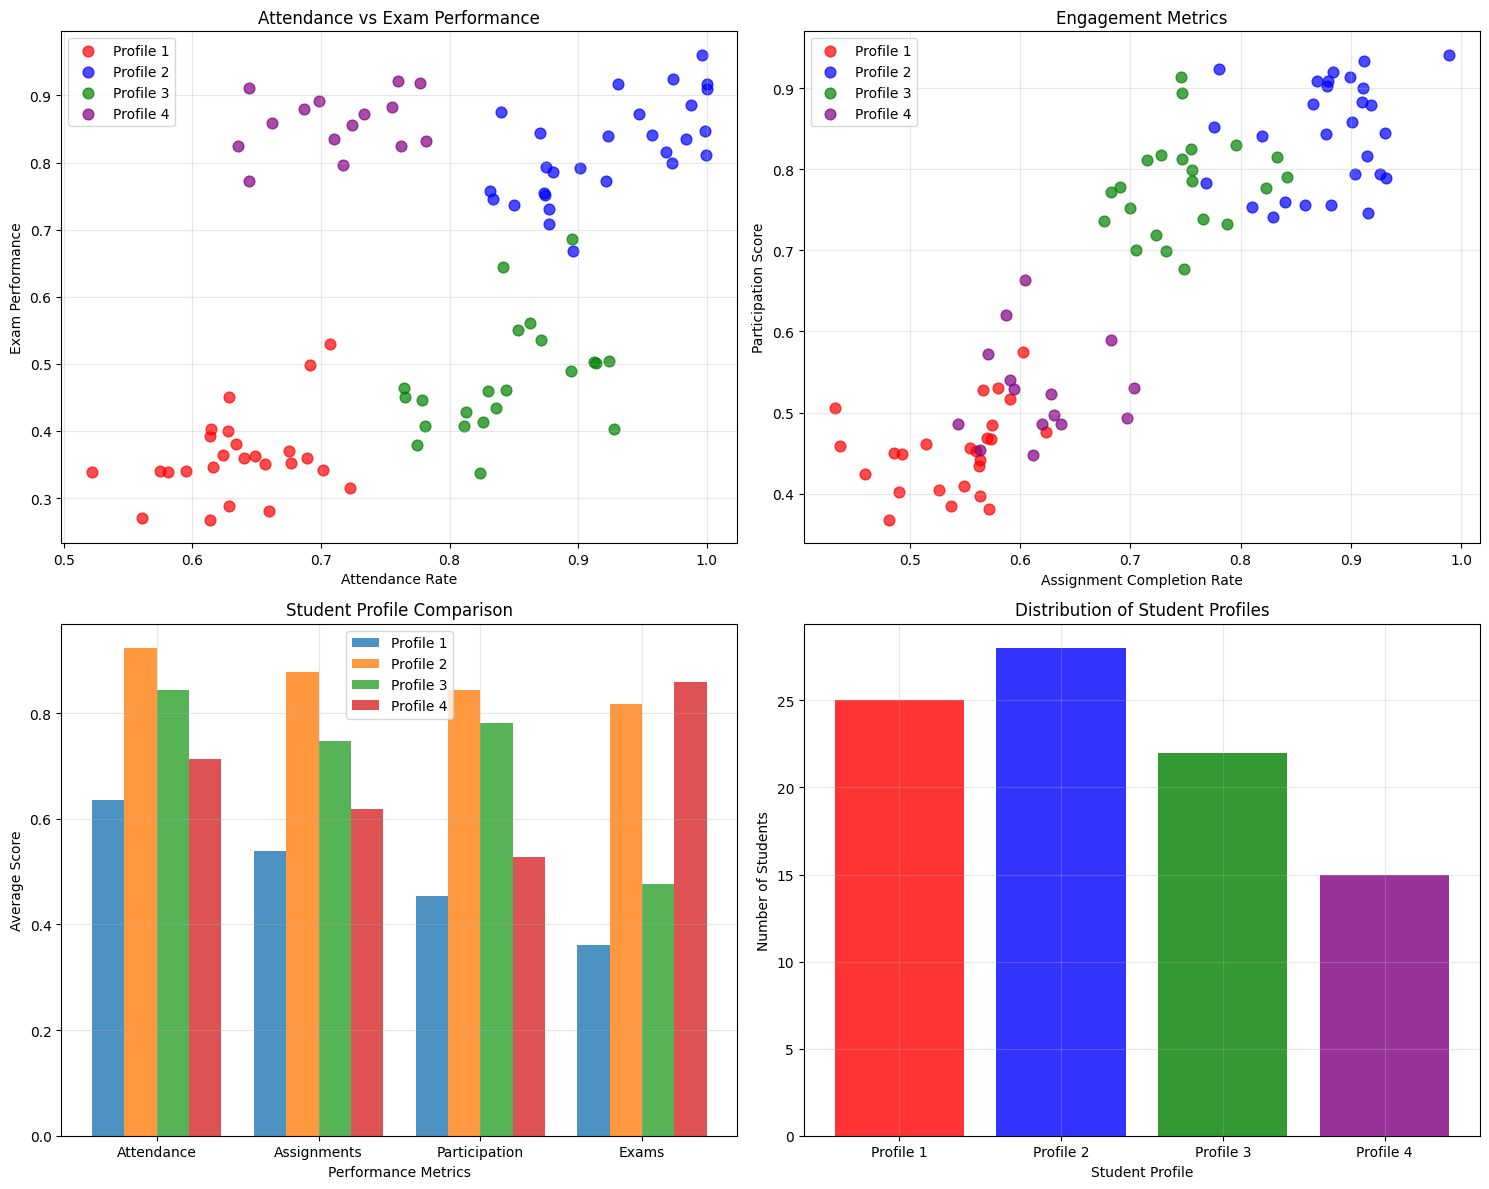

In [69]:
# Step 4: Visualize the results
# TODO: Create meaningful visualizations of your clusters

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Visualization 1: Attendance vs Exam Performance
for i in range(optimal_k):
    cluster_data = student_performance[student_performance['cluster'] == i]
    axes[0, 0].scatter(cluster_data['attendance_rate'], cluster_data['exam_performance'], 
                      alpha=0.7, s=60, c=colors[i], label=f'Profile {i+1}')
axes[0, 0].set_xlabel('Attendance Rate')
axes[0, 0].set_ylabel('Exam Performance')
axes[0, 0].set_title('Attendance vs Exam Performance')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Visualization 2: Assignment Completion vs Participation
for i in range(optimal_k):
    cluster_data = student_performance[student_performance['cluster'] == i]
    axes[0, 1].scatter(cluster_data['assignment_completion'], cluster_data['participation_score'], 
                      alpha=0.7, s=60, c=colors[i], label=f'Profile {i+1}')
axes[0, 1].set_xlabel('Assignment Completion Rate')
axes[0, 1].set_ylabel('Participation Score')
axes[0, 1].set_title('Engagement Metrics')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Visualization 3: Radar chart of cluster characteristics
cluster_means = student_performance.groupby('cluster').mean()
categories = ['Attendance', 'Assignments', 'Participation', 'Exams']

# Create a simple bar chart instead of radar for clarity
x = np.arange(len(categories))
width = 0.2

for i in range(optimal_k):
    values = [cluster_means.loc[i, 'attendance_rate'],
              cluster_means.loc[i, 'assignment_completion'],
              cluster_means.loc[i, 'participation_score'],
              cluster_means.loc[i, 'exam_performance']]
    axes[1, 0].bar(x + i*width, values, width, label=f'Profile {i+1}', alpha=0.8)

axes[1, 0].set_xlabel('Performance Metrics')
axes[1, 0].set_ylabel('Average Score')
axes[1, 0].set_title('Student Profile Comparison')
axes[1, 0].set_xticks(x + width * (optimal_k-1) / 2)
axes[1, 0].set_xticklabels(categories)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Visualization 4: Cluster sizes
cluster_counts = student_performance['cluster'].value_counts().sort_index()
axes[1, 1].bar(range(optimal_k), cluster_counts.values, color=colors[:optimal_k], alpha=0.8)
axes[1, 1].set_xlabel('Student Profile')
axes[1, 1].set_ylabel('Number of Students')
axes[1, 1].set_title('Distribution of Student Profiles')
axes[1, 1].set_xticks(range(optimal_k))
axes[1, 1].set_xticklabels([f'Profile {i+1}' for i in range(optimal_k)])
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Interpret results and provide recommendations
print("STUDENT PROFILE ANALYSIS & RECOMMENDATIONS")
print("="*60)

# Analyze each cluster and provide educational insights
for i in range(optimal_k):
    cluster_data = student_performance[student_performance['cluster'] == i]
    count = len(cluster_data)
    
    # Calculate cluster characteristics
    avg_attendance = cluster_data['attendance_rate'].mean()
    avg_assignments = cluster_data['assignment_completion'].mean()
    avg_participation = cluster_data['participation_score'].mean()
    avg_exam = cluster_data['exam_performance'].mean()
    
    print(f"\n📊 PROFILE {i+1}: {count} students ({count/len(student_performance)*100:.1f}% of class)")
    print("-" * 50)
    print(f"Attendance Rate:      {avg_attendance:.2f} ({avg_attendance*100:.0f}%)")
    print(f"Assignment Completion: {avg_assignments:.2f} ({avg_assignments*100:.0f}%)")
    print(f"Participation Score:   {avg_participation:.2f} ({avg_participation*100:.0f}%)")
    print(f"Exam Performance:      {avg_exam:.2f} ({avg_exam*100:.0f}%)")
    
    # Characterize the profile
    if avg_attendance > 0.85 and avg_exam > 0.75:
        profile_name = "🌟 ENGAGED ACHIEVERS"
        recommendations = [
            "Provide advanced challenges and extension activities",
            "Consider them for peer tutoring roles",
            "Offer independent study opportunities"
        ]
    elif avg_exam < 0.5:
        if avg_attendance > 0.75:
            profile_name = "😰 TEST-ANXIOUS LEARNERS"
            recommendations = [
                "Provide test-taking strategies and anxiety management",
                "Offer alternative assessment methods",
                "Schedule regular check-ins to build confidence"
            ]
        else:
            profile_name = "🆘 AT-RISK STUDENTS"
            recommendations = [
                "Immediate intervention and support services",
                "Connect with academic advisor/counselor",
                "Implement structured study plan"
            ]
    elif avg_exam > 0.75 and avg_attendance < 0.75:
        profile_name = "🎯 NATURAL TALENTS"
        recommendations = [
            "Emphasize the value of consistent engagement",
            "Connect learning to real-world applications",
            "Provide flexible attendance options if possible"
        ]
    else:
        profile_name = "⚖️ STEADY PERFORMERS"
        recommendations = [
            "Encourage continued consistent effort",
            "Provide targeted support in weaker areas",
            "Set incremental improvement goals"
        ]
    
    print(f"\n🏷️  Profile Type: {profile_name}")
    print("\n💡 Recommended Interventions:")
    for rec in recommendations:
        print(f"   • {rec}")

print("\n" + "="*60)
print("🎓 SUMMARY: These profiles can help you tailor your teaching approach")
print("   to better meet the diverse needs of your students!")

---

# Hour 2: Understanding and Applying Regression

## What is Regression and Why Does It Matter?

If clustering helps us discover hidden patterns in data, regression helps us understand and predict relationships between variables. While clustering asks "What groups exist in my data?", regression asks "How does changing X affect Y?"

### Real-World Regression Examples Across Disciplines

**Education:**
- How do study hours relate to exam scores?
- Can we predict student retention based on first-semester performance?
- How does class size affect learning outcomes?

**Business:**
- How does advertising spending influence sales?
- Can we predict customer lifetime value from initial purchase behavior?

**Sciences:**
- How does temperature affect chemical reaction rates?
- Can we predict population growth from environmental factors?

**Social Sciences:**
- How does income relate to educational attainment?
- Can we predict voting behavior from demographic data?

### The Core Idea of Regression

Regression finds the best mathematical relationship between an **input variable** (called the independent variable, predictor, or feature) and an **output variable** (called the dependent variable, target, or response). The simplest form is linear regression, which finds the best straight line through your data points.

## Linear Regression: Finding the Best Line

Let's start with a concrete example that many educators will find familiar: the relationship between study time and exam performance.

In [ ]:
# Create a realistic dataset showing the relationship between study hours and exam scores
np.random.seed(42)

# Generate study hours (independent variable)
study_hours = np.random.uniform(0, 20, 100)  # 0 to 20 hours of study

# Create exam scores with a realistic relationship to study hours
# Base score + (study effect * hours) + some randomness
exam_scores = 50 + 2.5 * study_hours + np.random.normal(0, 8, 100)

# Ensure scores stay within realistic bounds (0-100)
exam_scores = np.clip(exam_scores, 0, 100)

# Create DataFrame
study_data = pd.DataFrame({
    'study_hours': study_hours,
    'exam_score': exam_scores
})

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, exam_scores, alpha=0.6, s=50)
plt.xlabel('Study Hours per Week')
plt.ylabel('Exam Score')
plt.title('Relationship Between Study Time and Exam Performance')
plt.grid(True, alpha=0.3)

# Calculate and display correlation
correlation = np.corrcoef(study_hours, exam_scores)[0, 1]
plt.text(0.02, 0.98, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Dataset: {len(study_data)} students")
print(f"Study hours range: {study_hours.min():.1f} to {study_hours.max():.1f}")
print(f"Exam scores range: {exam_scores.min():.1f} to {exam_scores.max():.1f}")
print(f"Correlation coefficient: {correlation:.3f}")
print("\nWhat patterns do you notice in this data?")

## Implementing Linear Regression Step by Step

Linear regression finds the line that best fits through the data points. This line is described by the equation:

**y = mx + b**

Where:
- **y** is the predicted exam score
- **x** is the study hours
- **m** is the slope (how much the score increases per hour of study)
- **b** is the y-intercept (the predicted score with zero study hours)

The algorithm finds the values of m and b that minimize the distance between the actual data points and the predicted line.

In [ ]:
# Implement linear regression using scikit-learn
# First, we need to reshape our data for scikit-learn
X = study_hours.reshape(-1, 1)  # Features must be 2D array
y = exam_scores  # Target can be 1D array

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Make predictions
y_pred = linear_model.predict(X)

# Extract the slope and intercept
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

print("Linear Regression Results:")
print("="*40)
print(f"Equation: exam_score = {slope:.2f} * study_hours + {intercept:.2f}")
print(f"\nInterpretation:")
print(f"• Each additional hour of study increases exam score by {slope:.2f} points")
print(f"• A student who doesn't study is predicted to score {intercept:.1f} points")

# Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, exam_scores, alpha=0.6, s=50, label='Actual Data')
plt.plot(study_hours, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Study Hours per Week')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Study Hours vs Exam Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# Add equation to plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.02, 0.98, equation_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

## Evaluating Regression Performance

How do we know if our regression model is good? We use several metrics to evaluate performance:

1. **R² Score (Coefficient of Determination)**: Measures how much of the variation in exam scores is explained by study hours. Ranges from 0 to 1, where 1 means perfect prediction.

2. **Mean Squared Error (MSE)**: Average of squared differences between actual and predicted values. Lower is better.

3. **Root Mean Squared Error (RMSE)**: Square root of MSE, in the same units as our target variable.

In [ ]:
# Calculate evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Evaluation:")
print("="*40)
print(f"R² Score: {r2:.3f}")
print(f"  → {r2*100:.1f}% of exam score variation is explained by study hours")
print(f"\nMean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f} points")
print(f"  → On average, predictions are off by ±{rmse:.1f} points")

# Demonstrate predictions
print("\nExample Predictions:")
print("-" * 30)
test_hours = [5, 10, 15, 20]
for hours in test_hours:
    predicted_score = linear_model.predict([[hours]])[0]
    print(f"{hours:2d} study hours → {predicted_score:.1f} predicted score")

# Visualize residuals (differences between actual and predicted)
residuals = y - y_pred

plt.figure(figsize=(12, 5))

# Plot 1: Residuals vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8)
plt.xlabel('Predicted Exam Scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Plot 2: Distribution of Residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.8)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Analysis:")
print("Good residuals should be:")
print("• Randomly scattered around zero (no clear pattern)")
print("• Approximately normally distributed")
print("• Have consistent variance across predicted values")

## When Linear Regression Fails: Non-Linear Relationships

Linear regression assumes a straight-line relationship between variables. But what happens when the real relationship is curved? Let's explore this with a common scenario: the relationship between practice time and skill improvement.

In many learning scenarios, initial practice has a big impact, but additional practice yields diminishing returns (a curved relationship).

In [ ]:
# Create data with a non-linear relationship
np.random.seed(42)

# Practice hours
practice_hours = np.linspace(0, 20, 100)

# Skill improvement follows a logarithmic curve (diminishing returns)
# High initial gains, but improvements slow down with more practice
true_skill = 15 * np.log(practice_hours + 1) + np.random.normal(0, 3, 100)
true_skill = np.maximum(true_skill, 0)  # Skill can't be negative

# Try linear regression on this non-linear data
X_practice = practice_hours.reshape(-1, 1)
y_skill = true_skill

# Fit linear model
linear_model_nonlinear = LinearRegression()
linear_model_nonlinear.fit(X_practice, y_skill)
y_pred_linear = linear_model_nonlinear.predict(X_practice)

# Fit polynomial model (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_practice)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_skill)
y_pred_poly = poly_model.predict(X_poly)

# Calculate performance metrics
r2_linear = r2_score(y_skill, y_pred_linear)
r2_poly = r2_score(y_skill, y_pred_poly)
rmse_linear = np.sqrt(mean_squared_error(y_skill, y_pred_linear))
rmse_poly = np.sqrt(mean_squared_error(y_skill, y_pred_poly))

# Visualize the comparison
plt.figure(figsize=(15, 5))

# Plot 1: Linear regression on non-linear data
plt.subplot(1, 3, 1)
plt.scatter(practice_hours, true_skill, alpha=0.6, s=50, label='Actual Data')
plt.plot(practice_hours, y_pred_linear, color='red', linewidth=2, label='Linear Fit')
plt.xlabel('Practice Hours')
plt.ylabel('Skill Improvement')
plt.title(f'Linear Regression\nR² = {r2_linear:.3f}, RMSE = {rmse_linear:.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Polynomial regression
plt.subplot(1, 3, 2)
plt.scatter(practice_hours, true_skill, alpha=0.6, s=50, label='Actual Data')
plt.plot(practice_hours, y_pred_poly, color='green', linewidth=2, label='Polynomial Fit')
plt.xlabel('Practice Hours')
plt.ylabel('Skill Improvement')
plt.title(f'Polynomial Regression\nR² = {r2_poly:.3f}, RMSE = {rmse_poly:.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Residuals comparison
plt.subplot(1, 3, 3)
residuals_linear = y_skill - y_pred_linear
residuals_poly = y_skill - y_pred_poly
plt.scatter(practice_hours, residuals_linear, alpha=0.6, label='Linear Residuals', color='red')
plt.scatter(practice_hours, residuals_poly, alpha=0.6, label='Polynomial Residuals', color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.8)
plt.xlabel('Practice Hours')
plt.ylabel('Residuals')
plt.title('Residuals Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Performance Comparison:")
print("="*40)
print(f"Linear Regression:     R² = {r2_linear:.3f}, RMSE = {rmse_linear:.2f}")
print(f"Polynomial Regression: R² = {r2_poly:.3f}, RMSE = {rmse_poly:.2f}")
print(f"\nImprovement: {((r2_poly - r2_linear) / r2_linear * 100):.1f}% better R²")

print("\nKey Insights:")
print("• Linear regression fails when the relationship is curved")
print("• Polynomial regression can capture non-linear patterns")
print("• Look at residual plots to detect non-linear relationships")
print("• The residuals should show no clear pattern if the model fits well")

## Understanding When Linear Regression Works and When It Doesn't

Linear regression makes several important assumptions. When these assumptions are violated, the model may perform poorly or give misleading results. Let's explore the key assumptions with visual examples:

In [ ]:
# Create different scenarios to illustrate when linear regression works and fails
np.random.seed(42)
x = np.linspace(0, 10, 100)

# Scenario 1: Perfect for linear regression
y1 = 2 * x + 3 + np.random.normal(0, 1, 100)

# Scenario 2: Non-linear relationship
y2 = x**2 + np.random.normal(0, 3, 100)

# Scenario 3: Heteroscedasticity (changing variance)
y3 = 2 * x + np.random.normal(0, x * 0.5, 100)

# Scenario 4: Outliers present
y4 = 2 * x + 3 + np.random.normal(0, 1, 100)
y4[10] += 15  # Add an outlier
y4[50] -= 12  # Add another outlier

scenarios = [
    (y1, "Good: Linear Relationship", "Linear regression works well"),
    (y2, "Poor: Non-linear Relationship", "Consider polynomial regression"),
    (y3, "Poor: Changing Variance", "Violates equal variance assumption"),
    (y4, "Caution: Outliers Present", "Outliers can skew the line")
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (y, title, explanation) in enumerate(scenarios):
    # Fit linear regression
    model = LinearRegression()
    X_reshaped = x.reshape(-1, 1)
    model.fit(X_reshaped, y)
    y_pred = model.predict(X_reshaped)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Plot
    axes[i].scatter(x, y, alpha=0.6, s=30)
    axes[i].plot(x, y_pred, color='red', linewidth=2)
    axes[i].set_xlabel('X Variable')
    axes[i].set_ylabel('Y Variable')
    axes[i].set_title(f'{title}\nR² = {r2:.3f}')
    axes[i].grid(True, alpha=0.3)
    
    # Add explanation
    axes[i].text(0.02, 0.98, explanation, transform=axes[i].transAxes,
                verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("When to Use Linear Regression:")
print("="*50)
print("✅ GOOD cases:")
print("   • Relationship appears linear in scatter plots")
print("   • Residuals are randomly scattered around zero")
print("   • Variance is consistent across the range of X")
print("   • Few or no extreme outliers")

print("\n❌ PROBLEMATIC cases:")
print("   • Clear curved patterns in the data")
print("   • Residuals show systematic patterns")
print("   • Variance increases/decreases with X")
print("   • Extreme outliers pull the line away from the main pattern")

print("\n🔧 SOLUTIONS when linear regression fails:")
print("   • Polynomial regression for curved relationships")
print("   • Transform variables (log, square root, etc.)")
print("   • Robust regression methods for outliers")
print("   • Consider other algorithms (decision trees, neural networks)")

## Real-World Application: Predicting University Enrollment

Let's apply our regression knowledge to a realistic scenario that administrators and educators often face: predicting university enrollment based on various factors. This demonstrates how regression can inform strategic decision-making in education.

In [ ]:
# Create a realistic university enrollment dataset
np.random.seed(42)
n_years = 50

# Generate realistic university data
years = np.arange(1975, 1975 + n_years)
tuition_base = 5000  # Base tuition in 1975
tuition_growth = 1.04  # 4% annual increase

# Create correlated factors affecting enrollment
tuition = tuition_base * (tuition_growth ** np.arange(n_years))
unemployment_rate = 5 + 3 * np.sin(np.arange(n_years) * 0.3) + np.random.normal(0, 1, n_years)
state_funding = 50000 + np.random.normal(0, 8000, n_years)  # In thousands
marketing_spend = 100 + 50 * np.random.random(n_years)  # In thousands

# Enrollment is influenced by all these factors
base_enrollment = 8000
enrollment = (base_enrollment 
             - 0.3 * (tuition - tuition_base) / 1000  # Higher tuition reduces enrollment
             + 50 * unemployment_rate  # Higher unemployment increases enrollment
             + 0.05 * state_funding  # More funding increases enrollment
             + 10 * marketing_spend / 100  # Marketing increases enrollment
             + np.random.normal(0, 200, n_years))  # Random factors

# Create DataFrame
enrollment_data = pd.DataFrame({
    'year': years,
    'tuition': tuition,
    'unemployment_rate': unemployment_rate,
    'state_funding': state_funding,
    'marketing_spend': marketing_spend,
    'enrollment': enrollment
})

print("University Enrollment Dataset")
print("="*40)
print(f"Time period: {years[0]}-{years[-1]}")
print(f"Number of observations: {len(enrollment_data)}")
print("\nDataset preview:")
print(enrollment_data.head(10).round(2))
print("\nDataset statistics:")
print(enrollment_data.describe().round(2))

In [ ]:
# Visualize the relationships in the enrollment data
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Enrollment over time
axes[0, 0].plot(enrollment_data['year'], enrollment_data['enrollment'], 'b-o', markersize=4)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Enrollment')
axes[0, 0].set_title('Enrollment Trends Over Time')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Enrollment vs Tuition
axes[0, 1].scatter(enrollment_data['tuition'], enrollment_data['enrollment'], alpha=0.6)
axes[0, 1].set_xlabel('Tuition ($)')
axes[0, 1].set_ylabel('Enrollment')
axes[0, 1].set_title('Enrollment vs Tuition')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Enrollment vs Unemployment
axes[0, 2].scatter(enrollment_data['unemployment_rate'], enrollment_data['enrollment'], alpha=0.6)
axes[0, 2].set_xlabel('Unemployment Rate (%)')
axes[0, 2].set_ylabel('Enrollment')
axes[0, 2].set_title('Enrollment vs Unemployment Rate')
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Enrollment vs State Funding
axes[1, 0].scatter(enrollment_data['state_funding'], enrollment_data['enrollment'], alpha=0.6)
axes[1, 0].set_xlabel('State Funding ($1000s)')
axes[1, 0].set_ylabel('Enrollment')
axes[1, 0].set_title('Enrollment vs State Funding')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Enrollment vs Marketing Spend
axes[1, 1].scatter(enrollment_data['marketing_spend'], enrollment_data['enrollment'], alpha=0.6)
axes[1, 1].set_xlabel('Marketing Spend ($1000s)')
axes[1, 1].set_ylabel('Enrollment')
axes[1, 1].set_title('Enrollment vs Marketing Spend')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Correlation heatmap
correlation_matrix = enrollment_data[['tuition', 'unemployment_rate', 'state_funding', 
                                    'marketing_spend', 'enrollment']].corr()
im = axes[1, 2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 2].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 2].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 2].set_xticklabels(correlation_matrix.columns, rotation=45)
axes[1, 2].set_yticklabels(correlation_matrix.columns)
axes[1, 2].set_title('Correlation Matrix')

# Add correlation values to heatmap
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        axes[1, 2].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                       ha='center', va='center', color='black')

plt.colorbar(im, ax=axes[1, 2])
plt.tight_layout()
plt.show()

print("Key Observations:")
print("="*40)
for col in ['tuition', 'unemployment_rate', 'state_funding', 'marketing_spend']:
    corr = correlation_matrix.loc['enrollment', col]
    direction = "positive" if corr > 0 else "negative"
    strength = "strong" if abs(corr) > 0.7 else "moderate" if abs(corr) > 0.4 else "weak"
    print(f"• {col}: {strength} {direction} correlation ({corr:.3f})")

## Hour 2 Exercise: Building a Predictive Enrollment Model

Now it's your turn to build a comprehensive regression model! You'll create a model to predict university enrollment and evaluate how different factors impact student numbers.

**Scenario:** As a university administrator, you need to predict next year's enrollment to plan for staffing, resources, and facilities. You want to understand which factors most strongly influence enrollment decisions.

In [ ]:
print("EXERCISE: Building a University Enrollment Prediction Model")
print("="*65)
print("\nYour tasks:")
print("1. Split the data into training and testing sets")
print("2. Build a multiple linear regression model")
print("3. Evaluate model performance")
print("4. Interpret the coefficients for actionable insights")
print("5. Make predictions for future scenarios")

print("\n" + "-"*65)
print("Start your analysis below:")

# Step 1: Prepare the data
# Features (X) - all factors that might influence enrollment
feature_columns = ['tuition', 'unemployment_rate', 'state_funding', 'marketing_spend']
X_enrollment = enrollment_data[feature_columns]
y_enrollment = enrollment_data['enrollment']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_enrollment, y_enrollment, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} observations")
print(f"Testing set: {len(X_test)} observations")

# Step 2: Build the regression model
enrollment_model = LinearRegression()
enrollment_model.fit(X_train, y_train)

# Step 3: Make predictions
y_train_pred = enrollment_model.predict(X_train)
y_test_pred = enrollment_model.predict(X_test)

print("\n✓ Model trained successfully!")
print("✓ Predictions generated for training and test sets")